In [28]:
# Import
import os
import pandas as pd
import os
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [29]:
# Getting data for standard path
absolutePath = os.getcwd()
nlpRoot = os.path.abspath(os.path.join(diretorio_atual, os.pardir))

dataFilePath = '\data\data.xlsx'

try:
    data = pd.read_excel(nlpRoot + dataFilePath)
    print(data)
except FileNotFoundError:
    print(f'File Not found')

        UserTags                TimeStamps  \
0   @LulaOficial  2023-05-23T16:45:31.000Z   
1   @LulaOficial  2023-09-10T22:17:28.000Z   
2   @LulaOficial  2023-09-09T17:19:59.000Z   
3   @LulaOficial  2023-09-07T22:43:05.000Z   
4   @LulaOficial  2023-09-06T00:34:37.000Z   
5   @LulaOficial  2023-09-05T11:44:01.000Z   
6   @LulaOficial  2023-09-01T21:52:30.000Z   
7   @LulaOficial  2023-09-01T20:12:07.000Z   
8   @LulaOficial  2023-08-31T11:06:47.000Z   
9   @LulaOficial  2023-08-29T15:41:05.000Z   
10  @LulaOficial  2023-08-27T13:58:22.000Z   

                                               Tweets  
0   União e reconstrução do Brasil: acompanhe o tr...  
1   Conversei com o primeiro-ministro da Índia, \n...  
2   Conversei com a jornalista indiana \n@palkisu\...  
3   Até o Zé Gotinha desfilou no 7 de Setembro. \n...  
4   Um futuro digno para as nossas crianças. De to...  
5   Queria prestar minha solidariedade a população...  
6   Desde o ano passado eu tenho um problema na ca...  

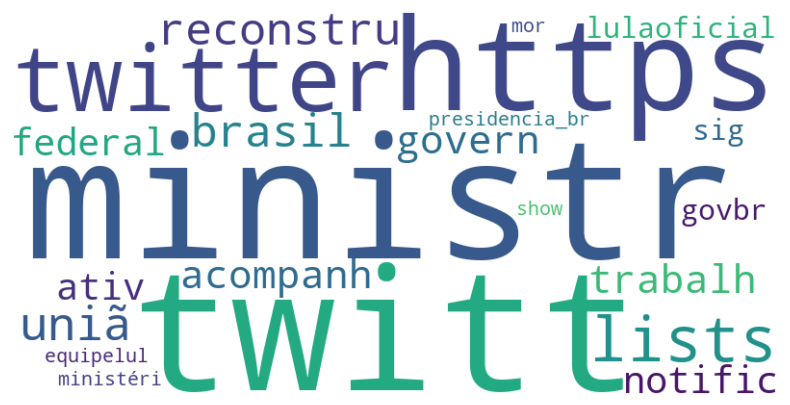

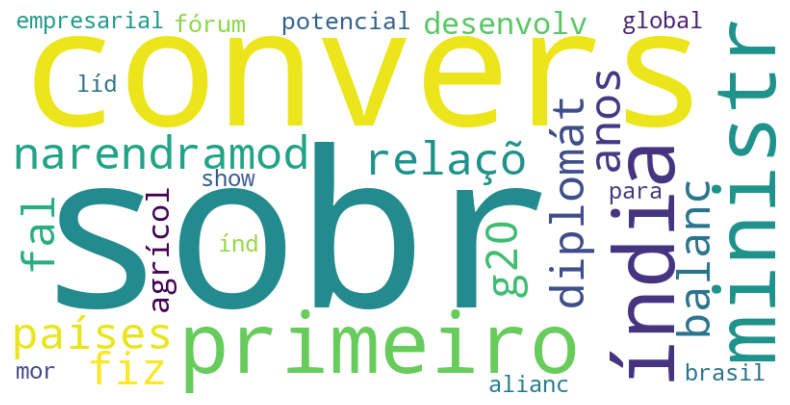

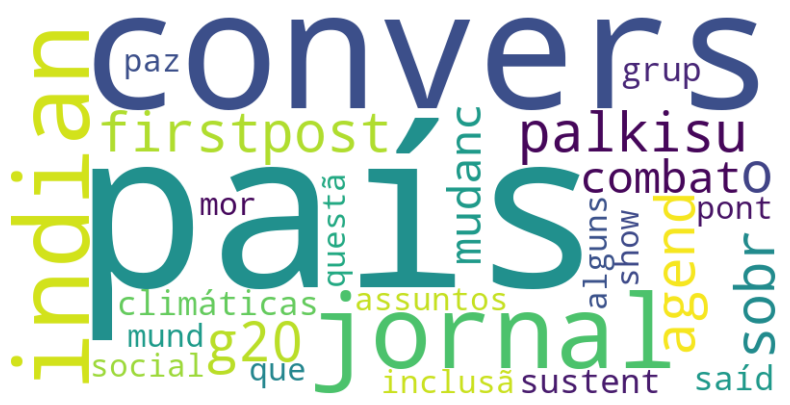

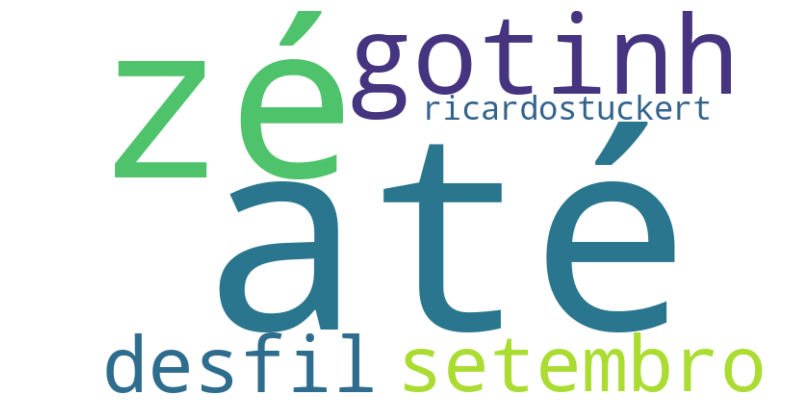

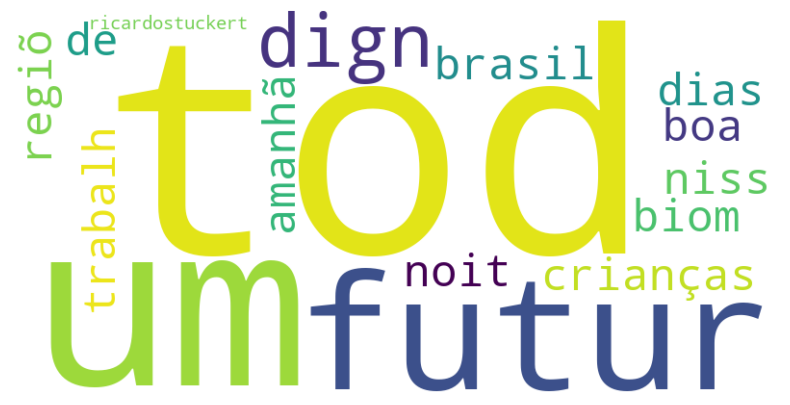

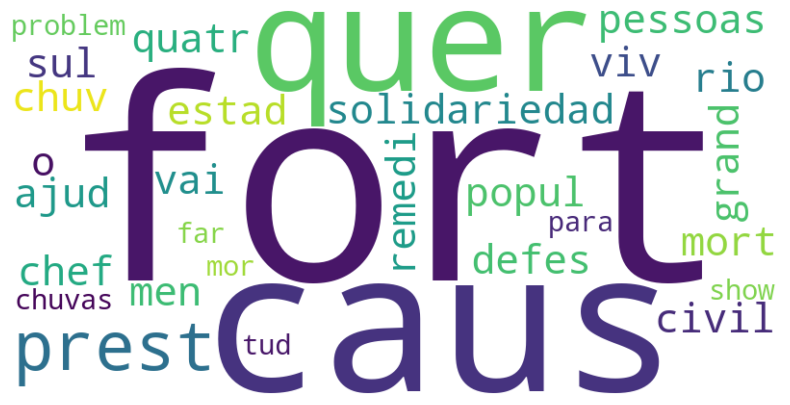

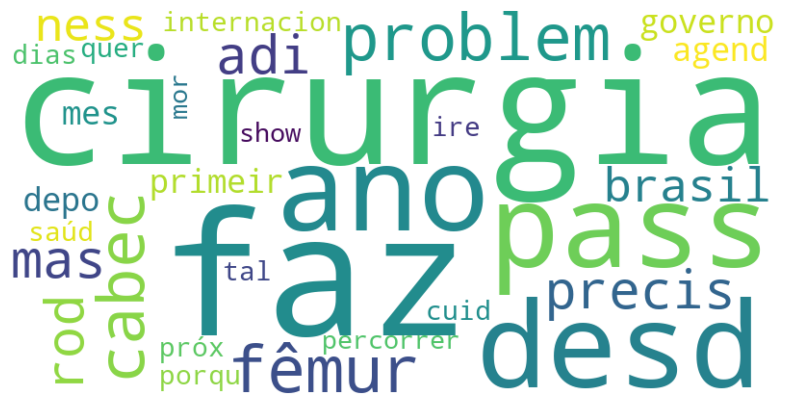

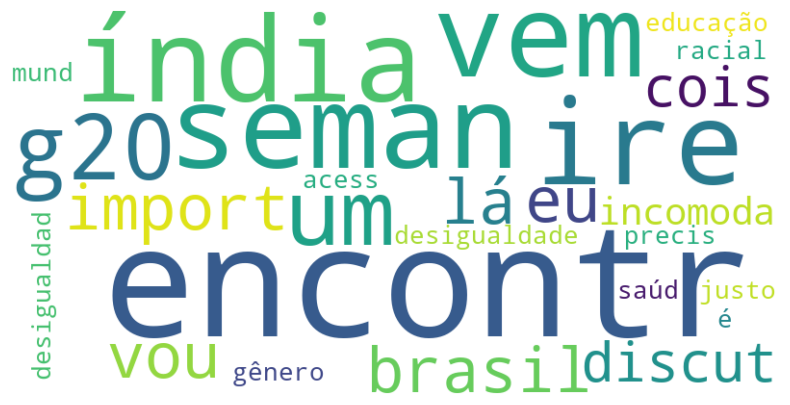

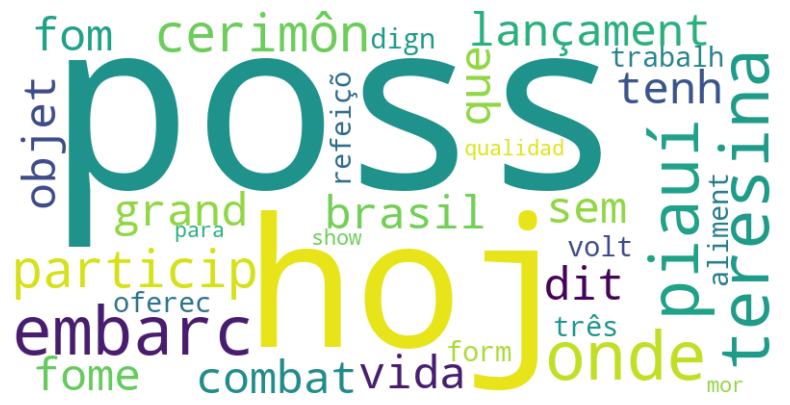

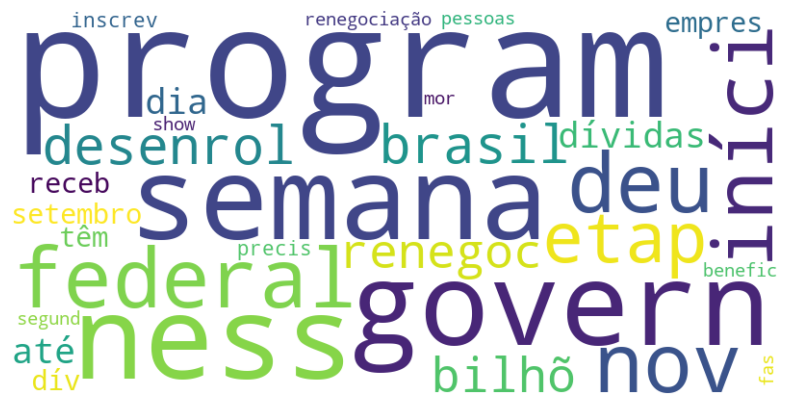

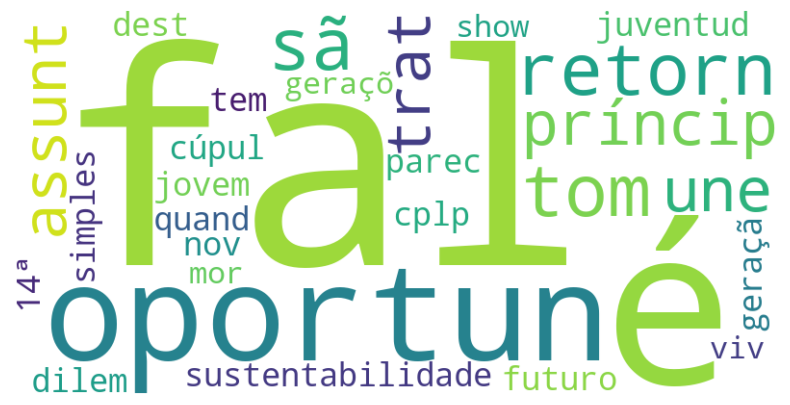

        UserTags                TimeStamps  \
0   @LulaOficial  2023-05-23T16:45:31.000Z   
1   @LulaOficial  2023-09-10T22:17:28.000Z   
2   @LulaOficial  2023-09-09T17:19:59.000Z   
3   @LulaOficial  2023-09-07T22:43:05.000Z   
4   @LulaOficial  2023-09-06T00:34:37.000Z   
5   @LulaOficial  2023-09-05T11:44:01.000Z   
6   @LulaOficial  2023-09-01T21:52:30.000Z   
7   @LulaOficial  2023-09-01T20:12:07.000Z   
8   @LulaOficial  2023-08-31T11:06:47.000Z   
9   @LulaOficial  2023-08-29T15:41:05.000Z   
10  @LulaOficial  2023-08-27T13:58:22.000Z   

                                               Tweets  Sentiment  \
0   União e reconstrução do Brasil: acompanhe o tr...    -0.5707   
1   Conversei com o primeiro-ministro da Índia, \n...     0.0000   
2   Conversei com a jornalista indiana \n@palkisu\...     0.0000   
3   Até o Zé Gotinha desfilou no 7 de Setembro. \n...    -0.2960   
4   Um futuro digno para as nossas crianças. De to...     0.0000   
5   Queria prestar minha solidariedade 

In [32]:
sia = SentimentIntensityAnalyzer()
stemmer = SnowballStemmer("portuguese")
stop_words = set(stopwords.words("portuguese"))

try:
    def analyze_sentiment(text):
        sentiment_scores = sia.polarity_scores(text)
        return sentiment_scores['compound']

    def lemmatize_text(text):
        words = text.split()
        lemmatized_words = [stemmer.stem(word) for word in words if word not in stop_words]
        return ' '.join(lemmatized_words)
    
    def generate_wordcloud(text):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        
    data['Sentiment'] = data['Tweets'].apply(analyze_sentiment)
    data['Lemmatized_Tweets'] = data['Tweets'].apply(lemmatize_text)
    
    for index, row in data.iterrows():
        generate_wordcloud(row['Lemmatized_Tweets'])
    
except FileNotFoundError:
    print(f'File Not found')
